# Octo Dataloading Examples

This notebook will walk you through some of the primary features of the Octo dataloader. Data is, after all, the most important part of any machine learning pipeline!

## Loading Open X-Embodiment Data

The [Open X-Embodiment (OXE)](https://robotics-transformer-x.github.io/) project was a massive cross-instutition data collection collaboration the likes of which robot learning has never seen before. The resulting dataset includes 22 different robots demonstrating 527 skills and totals over 1 million trajectories. However, as we found throughout the course of the Octo project, simply loading such a diverse set of robot data is no small feat. We hope that the `octo.data` pipeline can help kickstart anyone who hopes to take advantage of the massive collection of robot demonstrations that is OXE!

### Minimum working example to load a single OXE dataset

2024-10-30 17:19:05.422392: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-30 17:19:05.422454: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-30 17:19:05.423564: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-30 17:19:05.429813: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-30 17:19:07.227787: W tensorflow/compiler/tf2

{'action': {'mean': [-0.07678338885307312, 0.003684908151626587, 0.05644915625452995, 0.0, 0.0, 0.0, 0.3510494828224182], 'std': [0.6367746591567993, 0.3788922429084778, 0.47796523571014404, 0.0, 0.0, 0.0, 0.47721120715141296], 'max': [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0], 'min': [-1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0]}, 'proprio': {'mean': [-0.022537581622600555, 0.42213985323905945, 0.011554290540516376, -2.040088415145874, -0.004423689097166061, 2.439957857131958, 0.7625681757926941, 0.03848213702440262], 'std': [0.16836701333522797, 0.22386117279529572, 0.11846762150526047, 0.3187604546546936, 0.01218267623335123, 0.26838329434394836, 0.26119136810302734, 0.0299441609531641], 'max': [0.25105541944503784, 1.0239691734313965, 0.25514841079711914, 0.0, 0.05838121101260185, 3.0727620124816895, 1.1911247968673706, 0.07999841868877411], 'min': [-0.46276336908340454, -0.2620261609554291, -0.37377235293388367, -3.010026693344116, -0.015008972026407719, 0.0, 0.0, 0.00019240332767367363]}, 'num

2024-10-30 17:19:13.728910: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


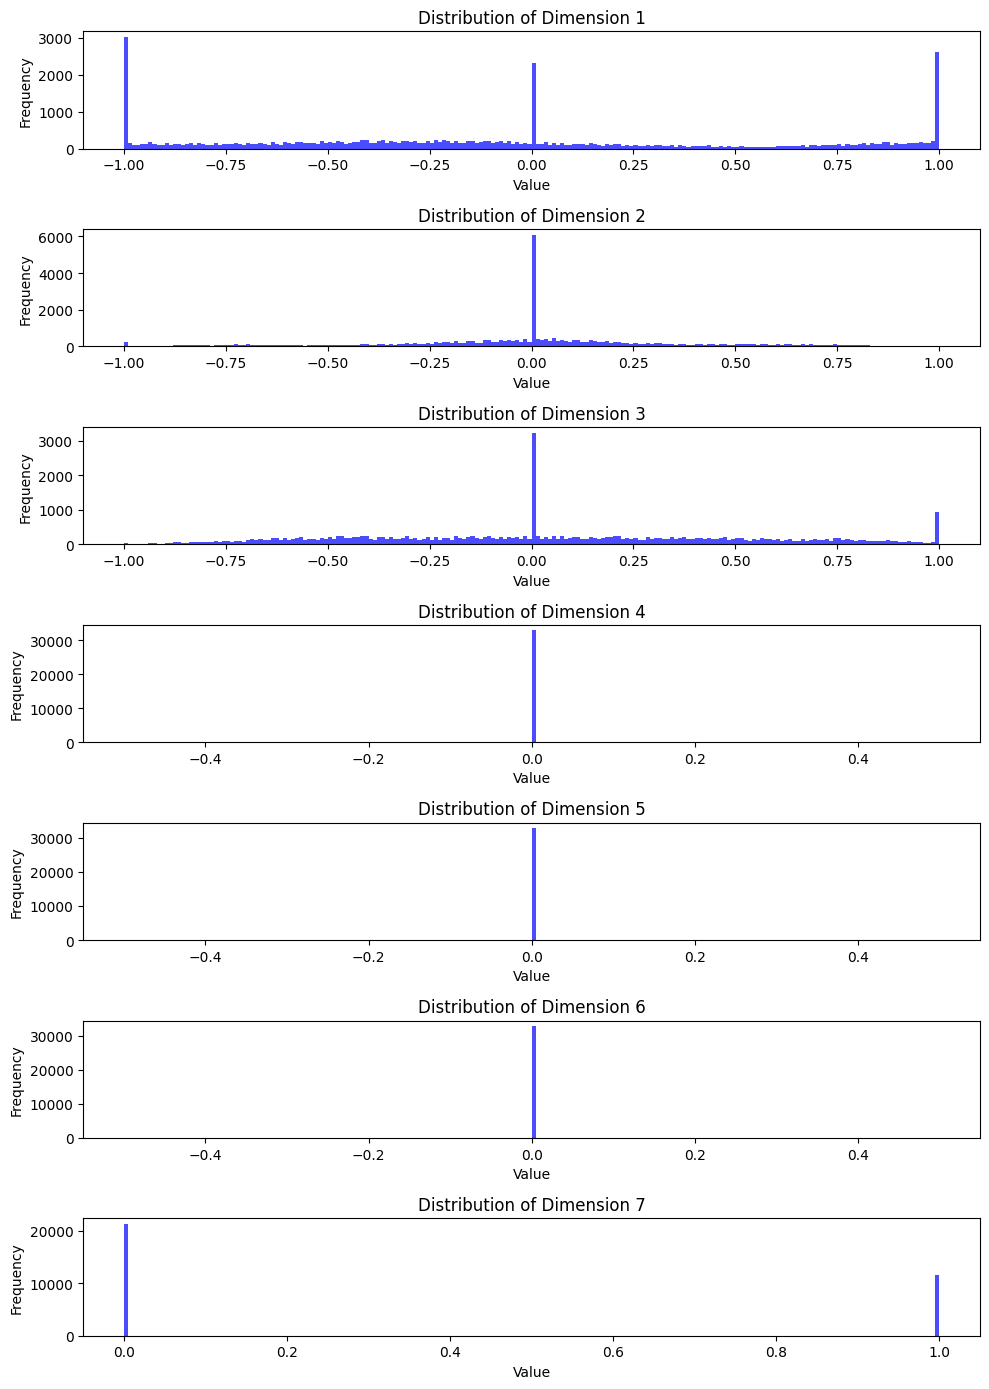

std mean list length: (7,) (7,)
later: [-2.9434119595915664, -1.7017710233351169, -2.0918771653988215, 0.0, 0.0, 0.0, -1.796815662956743] [2.7900194888888645, 1.707903712265506, 2.205075937175509, 0.0, 0.0, 0.0, 2.4990256919157434]
dataset type: <class 'dlimp.dataset.DLataset'>
upper bound: [4.502068096309719, 4.4978983718078025, 4.495362030005615, 0.0, 0.0, 0.0, 2.4990256919157314]
lower bound: [-4.501794337686583, -4.501163487901709, -4.494733423929694, 0.0, 0.0, 0.0, -1.7968156629567311]
(32805, 7)


outlier final check: 0
data final check: 48
whole dataset: 48
total outlier1: 0
total trajectory1: 48
total outlier2: 0
total trajectory2: 48
dataset & outlier1:traj1: austin_buds_dataset_converted_externally_to_rlds 0:48
dataset & outlier2:traj2: austin_buds_dataset_converted_externally_to_rlds 0:48


In [1]:
# minimum working example to load a single OXE dataset
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from octo.data.oxe import make_oxe_dataset_kwargs
from octo.data.dataset import make_single_dataset
from PIL import Image
import numpy as np
import mediapy
import cv2
import base64
import numpy as np
from matplotlib import pyplot as plt

from IPython.display import display, Image, Audio
import time
from openai import OpenAI
import os
import requests


outlier_total1 = 0
traj_total1 = 0

outlier_total2 = 0
traj_total2 = 0

dataset_list = [
    "austin_buds_dataset_converted_externally_to_rlds",
    # "austin_sailor_dataset_converted_externally_to_rlds",
    # "austin_sirius_dataset_converted_externally_to_rlds",
    # "berkeley_fanuc_manipulation",
    
    # "berkeley_cable_routing",
    
    
    # "cmu_stretch",
    # "furniture_bench_dataset_converted_externally_to_rlds",
    # "iamlab_cmu_pickup_insert_converted_externally_to_rlds",
    # "dlr_edan_shared_control_converted_externally_to_rlds",
    # "jaco_play",
    # "kuka",
    
    # "nyu_door_opening_surprising_effectiveness",
    # "nyu_franka_play_dataset_converted_externally_to_rlds", 
    # "ucsd_kitchen_dataset_converted_externally_to_rlds",
    # "utaustin_mutex",
    # "viola",
    # "taco_play",
    # "stanford_hydra_dataset_converted_externally_to_rlds",
    # "roboturk",
    # "toto",
    # "bc_z",
    # "bridge_dataset",
    # "fractal20220817_data",
    # "berkeley_autolab_ur5",
    # "language_table",
    ]
for dataset_name in dataset_list:
    dataset_kwargs = make_oxe_dataset_kwargs(
        # see octo/data/oxe/oxe_dataset_configs.py for available datasets
        dataset_name,
        # can be local or on cloud storage (anything supported by TFDS)
        # "/path/to/base/oxe/directory",
        # "gs://gresearch/robotics",
        "/mnt/cube/datasets/X-embodiment",
    )
    dataset,outlier_counter1,traj_counter1, outlier_counter2, traj_counter2, outlier_dataset= make_single_dataset(dataset_kwargs, train=True) # load the train split
    
    outlier_total1 += outlier_counter1
    traj_total1 += traj_counter1

    outlier_total2 += outlier_counter2
    traj_total2 += traj_counter2
    print("total outlier1:",outlier_total1)
    print("total trajectory1:",traj_total1)

    print("total outlier2:",outlier_total2)
    print("total trajectory2:",traj_total2)

    print("dataset & outlier1:traj1:",f"{dataset_name} {outlier_counter1}:{traj_counter1}")
    print("dataset & outlier2:traj2:",f"{dataset_name} {outlier_counter2}:{traj_counter2}")
iterator3 = dataset.iterator()
iterator2 = outlier_dataset.iterator()


In [4]:
# make_single_dataset yields entire trajectories
import numpy as np
# print("Top-level keys: ", traj["observation"].keys())
# x, y, z, roll, pitch, yaw, gripper opening
# action = np.squeeze(traj["action"])
# print("Observation keys: ", traj["observation"].keys())
# print("Task keys: ", traj["task"].keys())
# print("language_instruction: ", np.array(traj["task"]["language_instruction"]))
traj = next(iterator3)
instruction = np.array(traj["task"]["language_instruction"])
# print(instruction)
# print("actions: ", traj["action"])
# # print("image_primary: ", traj["observation"]["image_primary"].shape)
# print("proprio: ", traj["observation"]["proprio"])
# print("timestep: ", traj["observation"]["timestep"].shape)
# print("pad_mask_dict keys: ", traj["observation"]["pad_mask_dict"].keys())
# print("image_primary mask keys: ", traj["observation"]["pad_mask_dict"]["image_primary"].shape)
# print("proprio mask keys: ", traj["observation"]["pad_mask_dict"]["proprio"][:10])
# print("timestep mask keys: ", traj["observation"]["pad_mask_dict"]["timestep"][:10])

In [5]:
import cv2
import base64
# traj = next(iterator)
images = traj["observation"]["image_primary"]
# should be: (traj_len, window_size, height, width, channels)
# (window_size defaults to 1)

# Image.fromarray(np.concatenate(images.squeeze()[-10:], axis=1))
img = np.squeeze(images)
gpt_input = []
for i in img:
    # im = Image.fromarray(i)
    _, buffer = cv2.imencode(".jpg", i)
    gpt_input.append(base64.b64encode(buffer).decode("utf-8"))

# mediapy.show_video(images.squeeze(), fps=30)

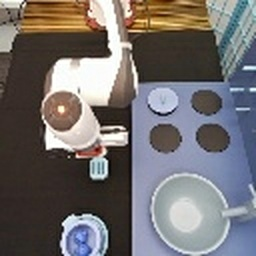

In [6]:
import time
from IPython.display import Image, display
display_handle = display(None, display_id=True)
for img in gpt_input:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)


In [303]:
# from IPython.display import Image, display
instruction = "route the cable into any metal clip"
# img = gpt_input[0]  # Take the first image
# decoded_image = base64.b64decode(img.encode("utf-8"))
# display(Image(data=decoded_image))
# print(len(gpt_input))

In [ ]:

client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", ""))


PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [f"language instruction is: {instruction}. Does the robot arm in this video successfully accomplish the task? Give result either by 1 for succesful or 0 for unsuccessful. Only output number.",
            *map(lambda x: {"image": x, "resize": 256}, gpt_input[0::20])]
    },
]
params = {
    "model": "gpt-4o",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 200,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

1


In [ ]:
import cv2
import numpy as np

# Assuming images_array is a list of images (numpy arrays)
images_array = np.squeeze(images)
# images_array = [img1, img2, img3, ...]  # Replace with actual images


# Convert the first image to grayscale
prev_gray = cv2.cvtColor(images_array[0], cv2.COLOR_BGR2GRAY)

# Farneback Parameters
fb_params = dict(pyr_scale=0.5,
                 levels=3,
                 winsize=15,
                 iterations=3,
                 poly_n=5,
                 poly_sigma=1.2,
                 flags=0)

# Initialize a list to store motion magnitudes
motion_magnitudes = []

# Iterate through the image array
for i in range(1, len(images_array)):
    # Convert the current image to grayscale
    gray = cv2.cvtColor(images_array[i], cv2.COLOR_BGR2GRAY)
    
    # Calculate Farneback Optical Flow between prev_gray and gray
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, **fb_params)
    
    # Calculate the magnitude and angle of the 2D vectors
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    
    # Aggregate motion magnitude (sum or average)
    total_motion = np.sum(magnitude)
    # Alternatively, you could use np.mean(magnitude) if you want the average motion per pixel.
    motion_magnitudes.append(total_motion)
    
    # Update the previous grayscale image
    prev_gray = gray

# Now, motion_magnitudes contains the quantified motion between each consecutive pair of images
# You can analyze or visualize this data to understand the motion dynamics in the sequence of images


In [ ]:
sum(motion_magnitudes)/len(images_array)

In [ ]:
# you should set these much higher in practice (as large as your memory can hold!)
SHUFFLE_BUFFER_SIZE = 1000
BATCH_SIZE = 64
# turning a dataset of trajectories into a training-ready batched dataset
train_dataset = (
    dataset.flatten() # flattens trajectories into individual frames
    .shuffle(SHUFFLE_BUFFER_SIZE) # shuffles the frames
    .batch(BATCH_SIZE) # batches the frames
)
batch = next(train_dataset.iterator())
images = batch["observation"]["image_primary"]
# should be: (batch_size, window_size, height, width, channels)
print(images.shape)
Image.fromarray(np.concatenate(images.squeeze()[:10], axis=1))

### Loading a training-ready OXE mix

In reality, you're probably going to want to mix multiple datasets together, as well as use other transformations such as resizing, augmentation, windowing, etc. This section will show you how to get a proper OXE mix up and running, as well as demonstrate additional `octo.data` features for more realistic use-cases.

In [ ]:
from octo.data.oxe import make_oxe_dataset_kwargs_and_weights
from octo.data.dataset import make_interleaved_dataset

dataset_kwargs_list, sample_weights = make_oxe_dataset_kwargs_and_weights(
    # you can pass your own list of dataset names and sample weights here, but we've
    # also provided a few named mixes for convenience. The Octo model was trained
    # using the "oxe_magic_soup" mix.
    "rtx",
    # can be local or on cloud storage (anything supported by TFDS)
    "gs://gresearch/robotics",
    # let's get a wrist camera!
    load_camera_views=("primary", "wrist"),
)

# see `octo.data.dataset.make_dataset_from_rlds` for the meaning of these kwargs
dataset_kwargs_list[0]

In [ ]:
SHUFFLE_BUFFER_SIZE = 1000
BATCH_SIZE = 8

# each element of `dataset_kwargs_list` can be used with `make_single_dataset`, but let's
# use the more powerful `make_interleaved_dataset` to combine them for us!
dataset = make_interleaved_dataset(
    dataset_kwargs_list,
    sample_weights,
    train=True,
    # unlike our manual shuffling above, `make_interleaved_dataset` will shuffle
    # the JPEG-encoded images, so you should be able to fit a much larger buffer size
    shuffle_buffer_size=SHUFFLE_BUFFER_SIZE,
    batch_size=BATCH_SIZE,
    # see `octo.data.dataset.apply_trajectory_transforms` for full documentation
    # of these configuration options
    traj_transform_kwargs=dict(
        goal_relabeling_strategy="uniform",  # let's get some goal images
        window_size=2,  # let's get some history
        future_action_window_size=3,  # let's get some future actions for action chunking
        subsample_length=100,  # subsampling long trajectories improves shuffling a lot
    ),
    # see `octo.data.dataset.apply_frame_transforms` for full documentation
    # of these configuration options
    frame_transform_kwargs=dict(
        # let's apply some basic image augmentations -- see `dlimp.transforms.augment_image`
        # for full documentation of these configuration options
        image_augment_kwargs=dict(
            augment_order=["random_resized_crop", "random_brightness"],
            random_resized_crop=dict(scale=[0.8, 1.0], ratio=[0.9, 1.1]),
            random_brightness=[0.1],
        ),
        # provided a `resize_size` is highly recommended for a mixed dataset, otherwise
        # datasets with different resolutions will cause errors
        resize_size=dict(
            primary=(256, 256),
            wrist=(128, 128),
        ),
        # If parallelism options are not provided, they will default to tf.Data.AUTOTUNE.
        # However, we would highly recommend setting them manually if you run into issues
        # with memory or dataloading speed. Frame transforms are usually the speed
        # bottleneck (due to image decoding, augmentation, and resizing), so you can set
        # this to a very high value if you have a lot of CPU cores. Keep in mind that more
        # parallel calls also use more memory, though.
        num_parallel_calls=64,
    ),
    # Same spiel as above about performance, although trajectory transforms and data reading
    # are usually not the speed bottleneck. One reason to manually set these is if you want
    # to reduce memory usage (since autotune may spawn way more threads than necessary).
    traj_transform_threads=16,
    traj_read_threads=16,
)

# Another performance knob to tune is the number of batches to prefetch -- again,
# the default of tf.data.AUTOTUNE can sometimes use more memory than necessary.
iterator = dataset.iterator(prefetch=1)

In [ ]:
# phew, that was a lot of configuration! Let's see what we got.
batch = next(iterator)
print("Top-level keys: ", batch.keys())
# should now have "image_primary" and "image_wrist"!
print("Observation keys: ", batch["observation"].keys())
# should also have "image_primary" and "image_wrist", corresponding to future goal images
print("Task keys: ", batch["task"].keys())

In [ ]:
from PIL import Image
import numpy as np

images_primary = batch["observation"]["image_primary"]
images_wrist = batch["observation"]["image_wrist"]
# should be: (batch_size, window_size (now 2), height, width, channels)
print(images_primary.shape)
print(images_wrist.shape)
actions = batch["action"]
# should be: (batch_size, window_size + future_action_window_size (so 5), action_dim)
print(actions.shape)

In [ ]:
# let's visualize a window of primary images
display(Image.fromarray(np.concatenate(images_primary[0], axis=1)))
# now a window of wrist images -- many datasets don't have wrist images,
# so this will often be black
display(Image.fromarray(np.concatenate(images_wrist[0], axis=1)))
# pad_mask_dict also tells you which keys should be treated as padding
# (e.g., if the wrist camera is black, the corresponding pad_mask_dict entry is False)
print(batch["observation"]["pad_mask_dict"]["image_wrist"][0])

In [ ]:
# let's take a look at the "task" dict: it should now have both goal
# images and language instructions!
goal_primary = batch["task"]["image_primary"]
goal_wrist = batch["task"]["image_wrist"]
language_instruction = batch["task"]["language_instruction"]
display(Image.fromarray(goal_primary[0]))
display(Image.fromarray(goal_wrist[0]))
print(language_instruction[0])